In [3]:
import numpy as np
import pandas as pd

In [4]:


from scipy import stats
import statsmodels.api as sm   # regression

import matplotlib.pyplot as plt


C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
sp500 = pd.read_csv('SP500_DailyIndex-1.csv', parse_dates= ['Date'])

In [6]:
sp500.set_index('Date',inplace=True)

In [7]:
sp500.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1960-01-04  59.910000  59.910000  59.910000  59.910000  59.910000  3990000
1960-01-05  60.389999  60.389999  60.389999  60.389999  60.389999  3710000
1960-01-06  60.130001  60.130001  60.130001  60.130001  60.130001  3730000
1960-01-07  59.689999  59.689999  59.689999  59.689999  59.689999  3310000
1960-01-08  59.500000  59.500000  59.500000  59.500000  59.500000  3290000

In [8]:
sp500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [9]:
sp500.head()

Adj Close
Date                 
1960-01-04  59.910000
1960-01-05  60.389999
1960-01-06  60.130001
1960-01-07  59.689999
1960-01-08  59.500000

In [10]:
sp500.columns = ['sp500']

In [11]:
sp500['sp500ret'] = (sp500['sp500'] / sp500['sp500'].shift(1))  -1

In [12]:
sp500.dropna(inplace=True)

In [13]:
ff3 = pd.read_csv('FF3Factors_Daily-1.csv', parse_dates= ['Date'])

In [14]:
ff3.set_index('Date', inplace = True)

In [15]:
df = sp500.join(ff3, how= 'inner')

In [16]:
df.head()

sp500  sp500ret  Mkt-RF   SMB   HML     RF
Date                                                      
1960-01-05  60.389999  0.008012    0.78 -0.40  0.54  0.017
1960-01-06  60.130001 -0.004305   -0.47  0.13  0.36  0.017
1960-01-07  59.689999 -0.007318   -0.65  0.37  0.08  0.017
1960-01-08  59.500000 -0.003183   -0.33  0.18  0.10  0.017
1960-01-11  58.770000 -0.012269   -1.15  0.48  0.32  0.017

In [17]:
df['exret'] = df['sp500ret'] - df['RF'] / 100

In [32]:
df.head()

sp500  sp500ret  Mkt-RF   SMB   HML     RF     exret   cumprod
Date                                                                          
1960-01-05  60.389999  0.008012    0.78 -0.40  0.54  0.017  0.007842  1.000078
1960-01-06  60.130001 -0.004305   -0.47  0.13  0.36  0.017 -0.004475  0.999955
1960-01-07  59.689999 -0.007318   -0.65  0.37  0.08  0.017 -0.007488  0.999925
1960-01-08  59.500000 -0.003183   -0.33  0.18  0.10  0.017 -0.003353  0.999966
1960-01-11  58.770000 -0.012269   -1.15  0.48  0.32  0.017 -0.012439  0.999876

In [33]:
df1 = df.loc['1965-01-01':'2017-12-31']

In [34]:
cumret = pd.DataFrame((1+df['exret']).resample('M').prod())

In [35]:
cumret.columns = ['monthly_cumret']

In [36]:
cumret.head()

monthly_cumret
Date                      
1960-01-31        0.925220
1960-02-29        1.006350
1960-03-31        0.982703
1960-04-30        0.980507
1960-05-31        1.024057

In [37]:
df['cumprod'] = (1+ df['exret'] / 100)

In [38]:
def cumretfunc(df): 
    v=(df.prod())-1
    return v

In [39]:
# rollingret = pd.rolling_apply(monthlydf, 12, lambda x: np.prod(x))

In [40]:
cumret['rolling12_cumret'] = cumret.rolling(window=12,center=False).apply(lambda x: cumretfunc(x))

In [41]:
cumret.head(15)

monthly_cumret  rolling12_cumret
Date                                        
1960-01-31        0.925220               NaN
1960-02-29        1.006350               NaN
1960-03-31        0.982703               NaN
1960-04-30        0.980507               NaN
1960-05-31        1.024057               NaN
1960-06-30        1.017061               NaN
1960-07-31        0.973862               NaN
1960-08-31        1.024472               NaN
1960-09-30        0.938025               NaN
1960-10-31        0.995478               NaN
1960-11-30        1.038817               NaN
1960-12-31        1.044739         -0.055223
1961-01-31        1.061154          0.083584
1961-02-28        1.025312          0.104001
1961-03-31        1.023510          0.149845

In [42]:
# test to see if this is right

cumret['monthly_cumret'].iloc[0:12].prod()

0.9447767117349792

In [43]:
cumret1 = cumret.loc['1965-01-01':'2017-12-31']

In [44]:
len(df)

14598

In [45]:
delta = 60.0/61.0

In [46]:
type(df1['exret'][0:3])

pandas.core.series.Series

In [47]:
test = list(range(1,10))[::-1]
test

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [48]:
lst = []
test = []
test_exret = []
for i in range(len(df1)):
    reverse_index = np.array(range(1,i+2))[::-1]
    exret = df1['exret'].iloc[0:i+1]
    weighted_r = ((1 - delta) * (delta ** reverse_index)) * exret
    mean_r = weighted_r.sum()
    dev_sq = ((1 - delta) * (delta ** reverse_index))  *  ((exret - mean_r) ** 2)
    vol = dev_sq.sum() * 261
    lst.append(vol)
    test_exret.append(exret)
    test.append(reverse_index)
    
volatility = pd.DataFrame(lst)

In [49]:
dev_sq

Date
1965-01-04    1.374548e-102
1965-01-05    4.226356e-103
1965-01-06    1.375848e-103
1965-01-07    3.530236e-103
1965-01-08    4.843549e-105
1965-01-11    8.680445e-105
1965-01-12    7.607145e-104
1965-01-13    1.013464e-103
1965-01-14    2.502216e-104
1965-01-15    3.790724e-103
1965-01-18    1.832946e-103
1965-01-19    1.790280e-104
1965-01-20    5.168401e-104
1965-01-21    1.132854e-103
1965-01-22    9.632578e-104
1965-01-25    8.807955e-105
1965-01-26    4.237144e-107
1965-01-27    2.213631e-103
1965-01-28    1.470037e-103
1965-01-29    2.899016e-107
1965-02-01    1.785389e-104
1965-02-02    6.156447e-104
1965-02-03    1.865762e-108
1965-02-04    1.032555e-103
1965-02-05    6.981323e-103
1965-02-08    9.715794e-103
1965-02-09    2.526109e-103
1965-02-10    4.223431e-102
1965-02-11    5.904147e-102
1965-02-12    1.877399e-102
                  ...      
2017-11-16     5.480920e-07
2017-11-17     1.182285e-07
2017-11-20     2.465749e-09
2017-11-21     3.473987e-07
2017-11-22     

In [50]:
len(volatility)

13341

In [51]:
test

[array([1]),
 array([2, 1]),
 array([3, 2, 1]),
 array([4, 3, 2, 1]),
 array([5, 4, 3, 2, 1]),
 array([6, 5, 4, 3, 2, 1]),
 array([7, 6, 5, 4, 3, 2, 1]),
 array([8, 7, 6, 5, 4, 3, 2, 1]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1]),
 array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
         1]),
 array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
         2,  1]),
 array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
   

In [52]:
test_exret

[Date
 1965-01-04   -0.006276
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 1965-01-07    0.004219
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 1965-01-07    0.004219
 1965-01-08    0.001150
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 1965-01-07    0.004219
 1965-01-08    0.001150
 1965-01-11    0.000211
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 1965-01-07    0.004219
 1965-01-08    0.001150
 1965-01-11    0.000211
 1965-01-12    0.002319
 Name: exret, dtype: float64, Date
 1965-01-04   -0.006276
 1965-01-05    0.004609
 1965-01-06    0.002932
 1965

In [53]:
volatility.index = df1.index

In [54]:
volatility.columns = ['volatility']

In [55]:
final =df1.join(volatility, how='inner')

In [56]:
final.tail()

sp500  sp500ret  Mkt-RF   SMB   HML     RF     exret  \
Date                                                                     
2017-12-22  2683.340088 -0.000458   -0.07 -0.22 -0.20  0.004 -0.000498   
2017-12-26  2680.500000 -0.001058   -0.07  0.33 -0.06  0.004 -0.001098   
2017-12-27  2682.620117  0.000791    0.05 -0.13 -0.19  0.004  0.000751   
2017-12-28  2687.540039  0.001834    0.22  0.12  0.03  0.004  0.001794   
2017-12-29  2673.610107 -0.005183   -0.57 -0.31  0.02  0.004 -0.005223   

             cumprod  volatility  
Date                              
2017-12-22  0.999995    0.004088  
2017-12-26  0.999989    0.004037  
2017-12-27  1.000008    0.003971  
2017-12-28  1.000018    0.003909  
2017-12-29  0.999948    0.003998

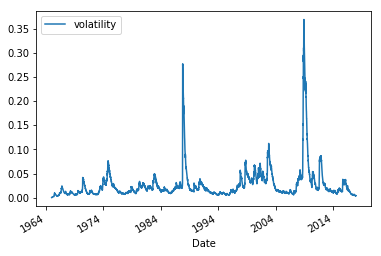

In [57]:
%matplotlib inline
volatility.plot()

In [32]:
# professor way

delta = 60.0/61.0
cols = ['Ret_stdev']
lst = []
test3 = []

for i in range(len(df1)):
    exret = df1['exret'].iloc[0:i+1]
    counter = np.array(range(0,i+1))[::-1]
    counter2 = (1-delta) * (delta**counter)
    exret_mn = np.dot(counter2, exret)
    test3.append(exret_mn)
    exret_devsq = np.dot(counter2, (exret-exret_mn)**2)
    exret_stdev = (261 * exret_devsq)**0.5
    lst.append(exret_stdev)


df1_stdev = pd.DataFrame(lst, columns = cols, index= df1.index)

In [35]:
df1_stdev = pd.DataFrame(lst, columns = cols, index= df1.index)

In [36]:
df1_stdev.head(100)

Ret_stdev
Date                 
1965-01-04   0.012768
1965-01-05   0.016009
1965-01-06   0.016998
1965-01-07   0.018878
1965-01-08   0.018826
1965-01-11   0.018670
1965-01-12   0.019005
1965-01-13   0.019404
1965-01-14   0.019268
1965-01-15   0.020639
1965-01-18   0.021164
1965-01-19   0.021071
1965-01-20   0.021002
1965-01-21   0.021079
1965-01-22   0.021258
1965-01-25   0.021123
1965-01-26   0.020946
1965-01-27   0.021436
1965-01-28   0.021662
1965-01-29   0.021474
1965-02-01   0.021331
1965-02-02   0.021294
1965-02-03   0.021111
1965-02-04   0.021163
1965-02-05   0.022522
1965-02-08   0.024227
1965-02-09   0.024672
1965-02-10   0.031346
1965-02-11   0.038401
1965-02-12   0.040861
...               ...
1965-04-13   0.043867
1965-04-14   0.043656
1965-04-15   0.043414
1965-04-19   0.043675
1965-04-20   0.043378
1965-04-21   0.043293
1965-04-22   0.044104
1965-04-23   0.043754
1965-04-26   0.043406
1965-04-27   0.043104
1965-04-28   0.042806
1965-04-29   0.042550
1965-04-30   0.042302
1965-05-03   0.041980
1965-05-04   0.041946
1965-05-05   0.041720
1965-05-06   0.041508
1965-05-07   0.041286
1965-05-10   0.041357
1965-05-11   0.041199
1965-05-12   0.041565
1965-05-13   0.041666
1965-05-14   0.041678
1965-05-17   0.043702
1965-05-18   0.043446
1965-05-19   0.043246
1965-05-20   0.044643
1965-05-21   0.045580
1965-05-24   0.047943
1965-05-25   0.048903

[100 rows x 1 columns]